<a href="https://colab.research.google.com/github/mrlocastellani/pamap2/blob/main/pamap2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
list_of_files = [r"/content/drive/MyDrive/ColabData/Protocol/subject101.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject102.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject103.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject104.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject105.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject106.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject107.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject108.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject109.dat"]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
                  1: 'lying',
                  2: 'sitting',
                  3: 'standing',
                  4: 'walking',
                  5: 'running',
                  6: 'cycling',
                  7: 'Nordic_walking',
                  9: 'watching_TV',
                  10: 'computer_work',
                  11: 'car driving',
                  12: 'ascending_stairs',
                  13: 'descending_stairs',
                  16: 'vacuum_cleaning',
                  17: 'ironing',
                  18: 'folding_laundry',
                  19: 'house_cleaning',
                  20: 'playing_soccer',
                  24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
            'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
            'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
            'chestGyro1', 'chestGyro2', 'chestGyro3',
            'chestMagne1', 'chestMagne2', 'chestMagne3',
            'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
            'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
            'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
            'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
            'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
            'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [ ]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = pd.concat([dataCollection, procData], ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()

In [ ]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns according to the readme
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points

        return dataCollection

In [ ]:
dataCol = dataCleaning(dataCollection)
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

In [ ]:
for i in range(0, 4):
    dataCol.loc[:3, "heartrate"] = 100

In [ ]:
dataCol.to_csv('pamap_data_collection.csv', index=False)

In [ ]:
dataCol

In [ ]:
dataCol.to_csv('/content/drive/MyDrive/ColabData/pamap_data_collection.csv', index=False)

In [ ]:
dataCol.head()

In [93]:
dataCollection = pd.read_csv('/content/drive/MyDrive/ColabData/pamap_data_collection.csv')

# Print the DataFrame to the console
print(dataCollection)

         timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
0            37.66           1      100.0           30.375      2.21530   
1            37.67           1      100.0           30.375      2.29196   
2            37.68           1      100.0           30.375      2.29090   
3            37.69           1      100.0           30.375      2.21800   
4            37.70           1      100.0           30.375      2.30106   
...            ...         ...        ...              ...          ...   
1942867      95.06          24      162.0           25.125      4.99466   
1942868      95.07          24      162.0           25.125      5.02764   
1942869      95.08          24      162.0           25.125      5.06409   
1942870      95.09          24      162.0           25.125      5.13914   
1942871      95.10          24      162.0           25.125      5.00812   

         handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
0            8.27915 

In [ ]:
plt.figure(figsize=(8, 6))
dataCollection['activityID'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Histogram of entries by Activity ID')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()

In [10]:
dataCollection

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [19]:
dataCollection.loc[(dataCollection['activityID'] == 1) & (dataCollection['subject_id'] == 1)].sort_values("timestamp")

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.767570,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.752470,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.737210,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.782640,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.752400,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27182,309.48,1,90.0,31.9375,2.12997,9.24242,2.92737,2.27595,9.38169,2.99104,...,9.76157,-0.271836,-1.101910,-0.011226,-0.019560,0.030938,-83.7157,-37.6422,-55.9650,1
27183,309.49,1,90.0,31.9375,2.16723,9.16625,2.92819,2.27519,9.27599,3.00638,...,9.76153,-0.196230,-1.117290,0.034832,-0.042563,0.011150,-83.8302,-37.7420,-56.4602,1
27184,309.50,1,90.0,31.9375,2.27471,9.27752,2.73698,2.34966,9.18483,2.99140,...,9.79144,-0.226511,-1.147620,0.022511,-0.055811,0.022022,-82.8234,-37.3426,-55.9691,1
27185,309.51,1,90.0,31.9375,2.20261,9.20323,2.85162,2.42488,9.13900,3.02162,...,9.79169,-0.226436,-1.087080,-0.006052,-0.014454,-0.003661,-83.6019,-37.9723,-56.3408,1


In [21]:
dataCollection.columns.values.tolist()

['timestamp',
 'activityID',
 'heartrate',
 'handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3',
 'subject_id']

In [106]:
data = dataCollection[dataCollection['activityID'].isin([1, 2, 3, 4, 16, 17])]
unique_combinations = dataCollection[['subject_id', 'activityID']].drop_duplicates()
feature_columns = ['heartrate',
 'handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3']
label_column = 'activityID'

In [109]:
activities = data['activityID'].unique()
subjects = data['subject_id'].unique()

scaler = StandardScaler()
results = {}

num_classes = len(data['activityID'].unique())

for subject in subjects:
    print("Subject: ", subject)
    train_data = data[data['subject_id'] != subject]
    test_data = data[data['subject_id'] == subject]

    for activity in activities:
        train_activity_data = train_data[train_data['activityID'] == activity]
        test_activity_data = test_data[test_data['activityID'] == activity]

        X_train = train_activity_data[feature_columns].values
        y_train = train_activity_data[label_column].values
        X_test = test_activity_data[feature_columns].values
        y_test = test_activity_data[label_column].values

        # Escalando os dados
        scaler.fit(X_train)

        print("X_train: ", X_train)
        print("X_test: ", X_test)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        print("X_train_scaled: ", X_train)
        print("X_test_scaled: ", X_test)

        X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
        X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

        model = Sequential()
        model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
        model.add(Dense(units=num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs=1, batch_size=32, validation_data=(X_test_scaled, y_test))

        loss, accuracy = model.evaluate(X_test_scaled, y_test)

        results[f"Subject_{subject}_Activity_{activity}"] = {'Loss': loss, 'Accuracy': accuracy}


Subject:  1
X_train:  [[129.46153846  33.4375      -6.88206    ... -47.1271       0.458018
   61.4844    ]
 [122.76923077  33.4375      -6.84775    ... -46.6862       0.562565
   60.7392    ]
 [116.07692308  33.4375      -6.96887    ... -46.9033       0.343084
   61.2338    ]
 ...
 [ 79.25        34.3125      -9.44652    ... -42.3941      23.8965
  -26.9932    ]
 [ 85.5         34.3125      -9.55481    ... -43.4152      23.6886
  -27.422     ]
 [ 91.75        34.3125      -9.55267    ... -43.1566      23.6766
  -27.1374    ]]
X_test:  [[100.       30.375     2.2153  ... -61.1081  -36.8636  -58.3696 ]
 [100.       30.375     2.29196 ... -60.8916  -36.3197  -58.3656 ]
 [100.       30.375     2.2909  ... -60.3407  -35.7842  -58.6119 ]
 ...
 [ 90.       31.9375    2.27471 ... -82.8234  -37.3426  -55.9691 ]
 [ 90.       31.9375    2.20261 ... -83.6019  -37.9723  -56.3408 ]
 [ 90.       31.9375    2.2026  ... -83.6035  -37.8619  -56.3396 ]]
X_train_scaled:  [[129.46153846  33.4375      -6.88

InvalidArgumentError: ignored

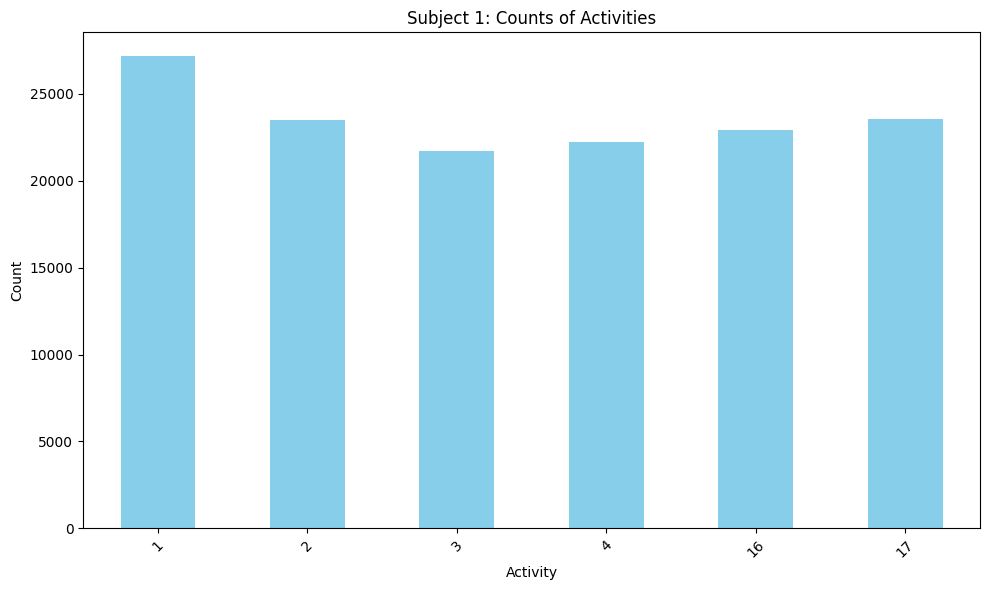

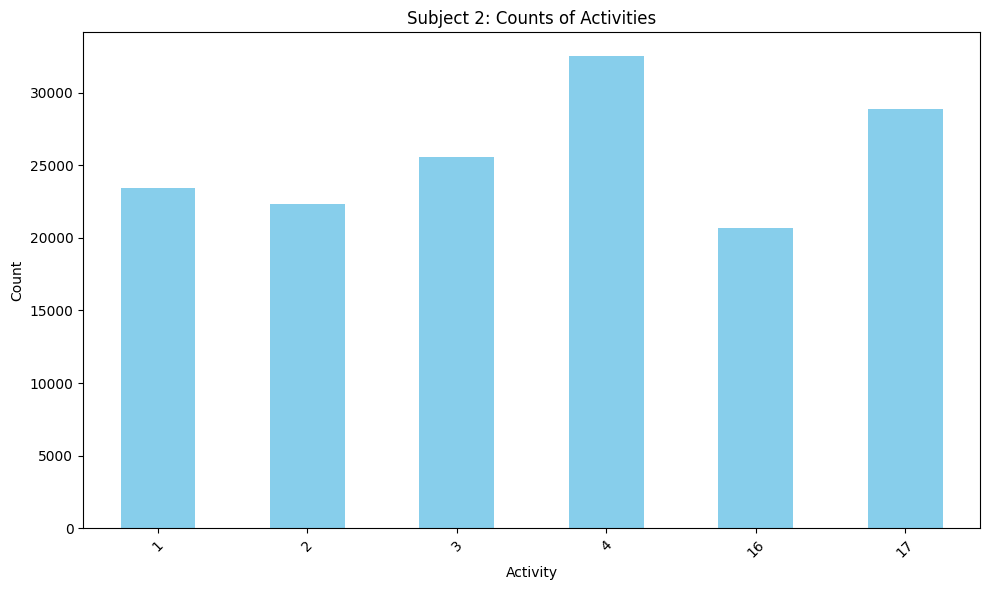

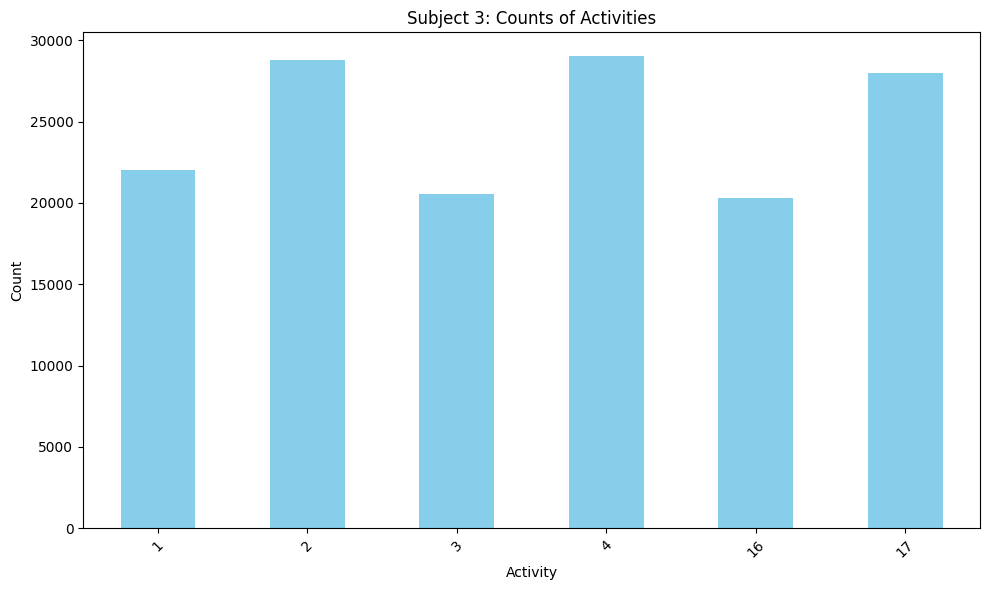

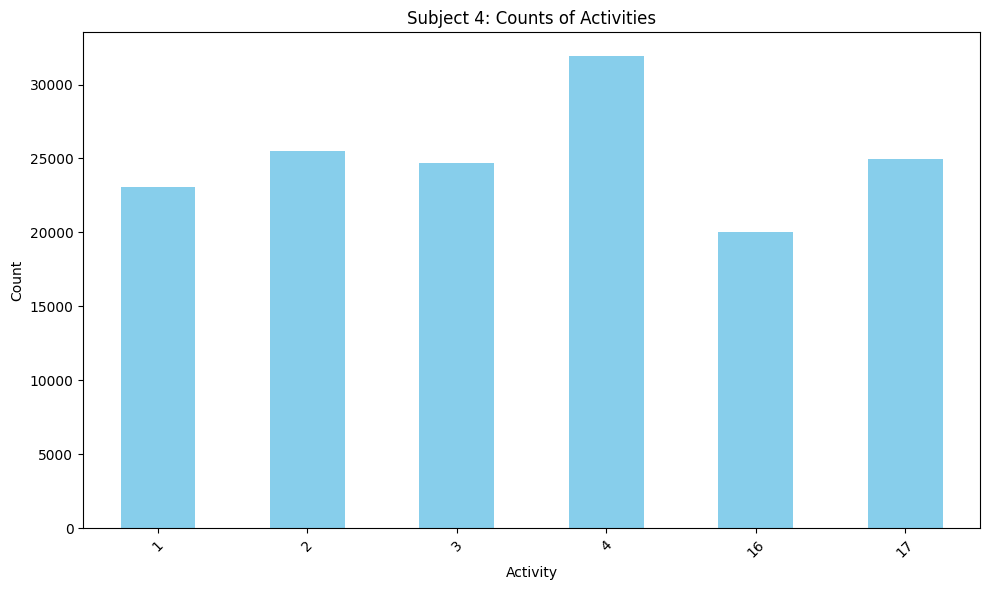

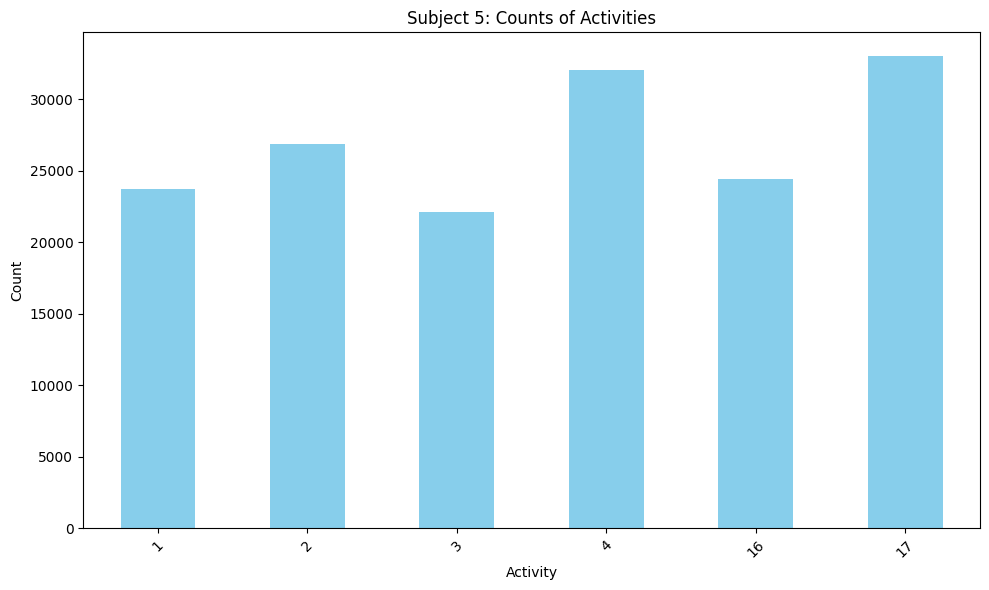

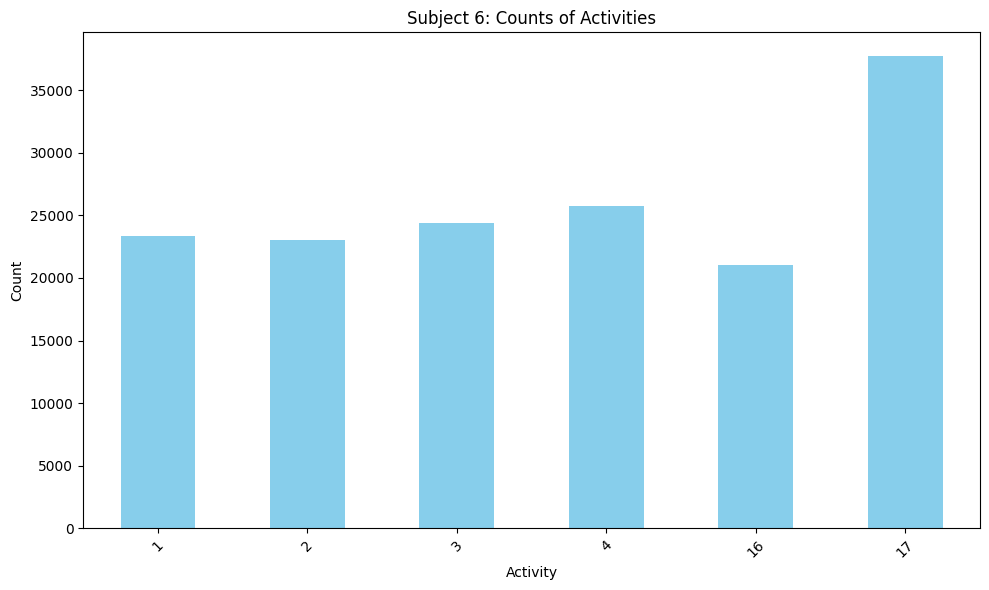

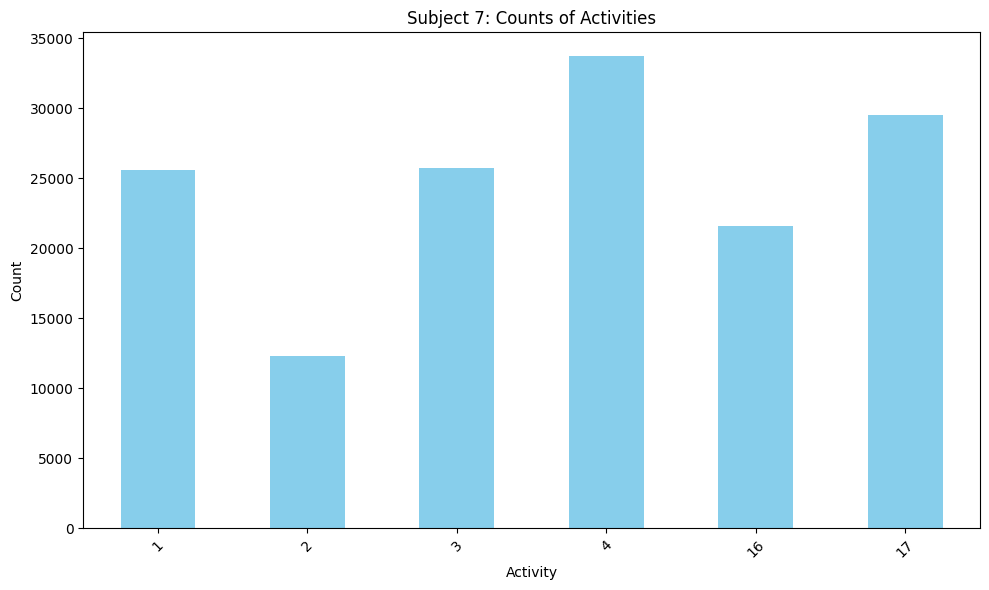

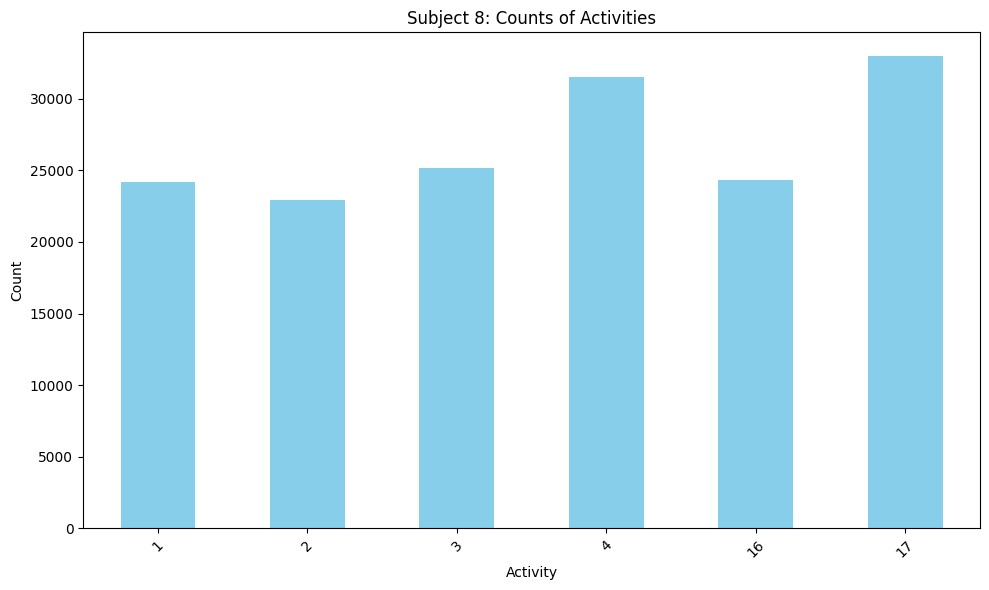

In [103]:
counts = data.groupby(['subject_id', 'activityID']).size().unstack()

# Plotagem do gráfico de barras para cada sujeito
for subject in counts.index:
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
    counts.loc[subject].plot(kind='bar', color='skyblue')
    plt.title(f"Subject {subject}: Counts of Activities")
    plt.xlabel("Activity")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Dicionário para armazenar as precisões médias por atividade
activity_accuracies = defaultdict(list)

# Agrupar as precisões por atividade
for key, value in results.items():
    subject_activity = key.split('_Activity_')
    activity_accuracies[subject_activity[1]].append(value['Accuracy'])

# Calcular a precisão média para cada atividade
average_accuracies = {activity: sum(acc) / len(acc) for activity, acc in activity_accuracies.items()}

# Criar o gráfico de barras para as precisões médias por atividade
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_accuracies)), list(average_accuracies.values()), color='green')
plt.xlabel('Atividade')
plt.ylabel('Precisão Média (Accuracy)')
plt.title('Precisão Média do Modelo por Atividade')
plt.xticks(range(len(average_accuracies)), list(average_accuracies.keys()), rotation=90)
plt.tight_layout()
plt.show()
